# Aritificial Neural Networks

----

# 1. Neural Network Basics


**A basic ANN Model Consists of:**
    
    1. Cost/Loss Function
    2. Optimization Algorithm
    3. Activation Function
    4. Normalization of Inputs or Batch Normalization
    5. Regularization

### 1.1 Cost Function

To find the error between true value and predicted values.

1. Quadratic Cost (MSE) - `mean_squared_error`
2. Crossentropy
    - 2.1 Binary Crossentropy - `binary_crossentropy`
    - 2.2 Categorical Crossentropy - `categorical_crossentropy`
    - 2.3 Sparse Categorical Crossentropy - `sparse_categorical_crossentropy`


3. Exponential Cost
4. Hellinger's Distance - `squared_hinge`
5. Kulbak-liebler Divergence - `kullback_leibler_divergence`

### 1.2 Optimization Algorithm

1. Batch GD - 
2. Mini Batch GD - 
3. Stochastic GD - `SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)`
4. GD with Momemtum - `SGD(lr=0.01, momentum=1.0, decay=0.0, nesterov=False)`
5. GD with NAG - `SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=True)`
6. RMSProp - `RMSprop(lr=0.001, rho=0.9, epsilon=0.01, decay=0.0)`
7. Adam (GD with Momemtum + RMSProp + Bias correction) - `Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0, amsgrad=False)`


8. Adagrad - `Adagrad`
9. Adadelta - `Adadelta`
10. Adamax - `Adamax`
11. NADAM Nesterov Adam - `Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.01, schedule_decay=0.004)`

### 1.3 Activation Functions

1. Identity - `linear`
2. Binary Step
3. Sigmoid - `sigmoid`
4. tanh - `tanh`
5. arctan
6. ReLU - `relu`
7. Leaky ReLU - Add as a layer: from keras.layers - `model.add(LeakyReLU())`
8. Softmax - `softmax`

### 1.4 Normalizations

1. Normalization (Min Max Scaling)- `MinMaxScaler()`
2. Standardisation - `StandardScaler()`
3. Batch Norm - Add as a layer: from keras.layers `BatchNormalization()`

### 1.5 Regularization

1. L1 Norm (Lasso) -  Add as a layer: from keras.layers `regularizers.l1()`
2. L2 Norm (Ridge) -  Add as a layer: from keras.layers `regularizers.l2()`
3. Droput Regularization - Add as a layer: from keras.layers `Dropout()`

# 2. Neural Network By Hand

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
from nnv import NNV
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, \
                            precision_score, recall_score, f1_score, silhouette_score
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

## 2. Data

In [2]:
data = pd.read_csv('../Data/ann_processed_cuboulder_TwitterData.csv')
df = data[['Processed_tweet', 'label']]
df

,Processed_tweet,label
0,campus dining location close today jan 1 happy...,Non_Research
1,what your campus dining option today jan 2 alf...,Non_Research
2,fpga design embed system soc verilog vlsi asic...,Non_Research
3,what your campus dining option today jan 3 alf...,Non_Research
4,anthro phd student m frequently ask why study ...,Research
...,...,...
3389,proud 17 faculty student give course panel tal...,Research
3390,oncology immunology immunotherapy genetherapy ...,Research
3391,sarcoma treatment treatment oncology immunolog...,Research
3392,one year since marshall fire boulder county co...,Research


In [3]:
print(df.shape, "\n\nNumber of Records: ", df.shape[0], "\nNumber of Columns: ", df.shape[1])

(3394, 2) 

Number of Records:  3394 
Number of Columns:  2


## 3. Features and Response

In [4]:
X = df['Processed_tweet']
Y = df['label']

In [5]:
X

0       campus dining location close today jan 1 happy...
1       what your campus dining option today jan 2 alf...
2       fpga design embed system soc verilog vlsi asic...
3       what your campus dining option today jan 3 alf...
4       anthro phd student m frequently ask why study ...
                              ...                        
3389    proud 17 faculty student give course panel tal...
3390    oncology immunology immunotherapy genetherapy ...
3391    sarcoma treatment treatment oncology immunolog...
3392    one year since marshall fire boulder county co...
3393                                  yes relate research
Name: Processed_tweet, Length: 3394, dtype: object

In [6]:
Y

0       Non_Research
1       Non_Research
2       Non_Research
3       Non_Research
4           Research
            ...     
3389        Research
3390        Research
3391        Research
3392        Research
3393        Research
Name: label, Length: 3394, dtype: object

## 4. Train Test Split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

print("Number of Records:\n\nTraining Set = ", len(X_train), "\nTraining Set = ", len(X_test))

Number of Records:

Training Set =  2545 
Training Set =  849


## 5. Preprocessing Data

In [8]:
# Create a Vector for our train data's vocabulary...
Vector = CountVectorizer()
Vector.fit(X_train)
X_train_vector = Vector.transform(X_train)
X_test_vector = Vector.transform(X_test)

In [9]:
norm = Normalizer().fit(X_train_vector)
X_train_vector = norm.transform(X_train_vector)
X_test_vector = norm.transform(X_test_vector)

In [10]:
# reducing dimensions of textual data
svd = TruncatedSVD(n_components=5, random_state=7)
X_train_vector_svd = svd.fit_transform(X_train_vector.toarray()) 
X_test_vector_svd = svd.fit_transform(X_test_vector.toarray()) 

In [11]:
print(X_train_vector_svd.shape)
X_train_vector_svd

(2545, 5)


array([[ 0.29174498, -0.09540863,  0.03836336, -0.02116479, -0.09126277],
       [ 0.07234276,  0.12623931, -0.02748015,  0.03473115, -0.06586759],
       [ 0.0950257 ,  0.14793345, -0.07669654,  0.05701495, -0.09468386],
       ...,
       [ 0.28916855, -0.00576943, -0.10458353, -0.02724289,  0.22207464],
       [ 0.25801685,  0.05490608, -0.05170505,  0.01057348, -0.04821936],
       [ 0.27264668, -0.06498997,  0.01903696, -0.00774291,  0.02563285]])

In [12]:
print(X_test_vector_svd.shape)
X_test_vector_svd

(849, 5)


array([[ 2.54401510e-01,  1.30878285e-02, -2.86121953e-02,
        -2.92040969e-02,  5.58922160e-02],
       [ 2.73008893e-01, -5.49562342e-02,  7.31446533e-02,
         4.37297008e-02, -1.19277241e-01],
       [ 8.16758632e-02,  1.73803130e-01, -8.28184660e-02,
         8.21111187e-02,  2.16919914e-02],
       ...,
       [ 2.13531308e-01, -6.08873729e-02,  2.01579048e-04,
        -4.87165645e-02,  9.16913870e-03],
       [ 8.80088229e-02,  1.93142882e-01, -9.02284278e-02,
         7.97292208e-02,  1.18373599e-01],
       [ 6.29581809e-02,  1.53224614e-01, -4.65012113e-02,
         4.07327772e-02, -5.35659158e-02]])

In [13]:
LE = LabelEncoder()
Y_train = LE.fit_transform(Y_train)
Y_test = LE.transform(Y_test)

In [14]:
print(Y_train.shape)
Y_train[:10]

(2545,)


array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [15]:
print(Y_test.shape)
Y_test[:10]

(849,)


array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

## 6. NN Architecture (with 1 Hidden Layer)

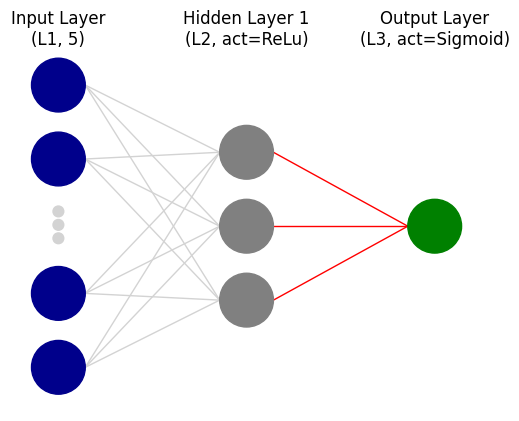

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

In [16]:
layersList = [
    {"title":"Input Layer\n(L1, 5)", "units": 5, "color": "darkBlue", "edges_color":"lightgray", "edges_width":1},
    {"title":"Hidden Layer 1\n(L2, act=ReLu)", "text":"o", "units": 3, "edges_color": "red", "edges_width":1},
    {"title":"Output Layer\n(L3, act=Sigmoid)", "units": 1, "color": "green"},
]
NNV(layersList, font_size=12, node_radius=20, spacing_layer=100, spacing_nodes=15).render()

Input Layer 

$\begin{equation*}
    \mathbf{X} = \begin{bmatrix}
                        X_{0} \\
                        X_{1} \\
                        X_{2} \\
                        X_{3} \\
                        X_{4} \\
                 \end{bmatrix}
\end{equation*}$

---
Weights

$\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space W^1_{0}\space\space\space\space W^1_{1}\space\space\space\space W^1_{2}$

$\begin{equation*}
    \mathbf{W^1} = \begin{bmatrix}
                        W_{0,0} & W_{0,1} & W_{0,2} \\
                        W_{1,0} & W_{1,1} & W_{1,2} \\
                        W_{2,0} & W_{2,1} & W_{2,2} \\
                        W_{3,0} & W_{3,1} & W_{3,2} \\
                        W_{4,0} & W_{4,1} & W_{4,2} \\
                 \end{bmatrix}
\end{equation*}$


$\begin{equation*}
    \mathbf{b^1} = \space\begin{bmatrix}
                        \space\space b^1_{0} \space\space\space & b^1_{1} \space\space\space\space & b^1_{2}\space\space\space\space
                 \end{bmatrix}
\end{equation*}$


$\begin{equation*}
    \mathbf{W^2} = \begin{bmatrix}
                        W_{0,0} \\
                        W_{1,0} \\
                        W_{2,0}
                 \end{bmatrix}
\end{equation*}$


$\begin{equation*}
    \mathbf{b^2} = \begin{bmatrix}
                        b^2_{0}
                 \end{bmatrix}
\end{equation*}$

---

Output

$Y = [y]$


---

Cost/Loss Function:

$MSE = \frac{1}{2n} \sum_{i=0} (\widehat y_i - y_i)^2\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space$        ;  where, n = number of samples (e.g., Output Layer has two nodes Y1, Y2 and 1 sample, then n = 1)


$\frac{d(MSE)}{d \widehat y} = \sum \frac{\widehat y_i - y_i}{n}$

.

## 7. NN  Modelling

In [17]:
def plot_metrics(Y_test, Y_pred, labels):
    """
        Function to output complete accuracy metrics for binary and multi-class classifiers!
        labels: list - list of unique labels str or numeric
    
    """
    print("--------------\n:: METRICS ::\n--------------\n")
    cm = confusion_matrix(Y_test, Y_pred, labels=labels)
    model_type = 'binary' if len(set(np.array(labels))) <=2 else "multi"
    if model_type == 'binary':
        """
                Binary Classification
        """
        TP = cm[1,1]
        FP = cm[0,1]
        FN = cm[1,0]
        TN = cm[0,0]
    else:
        """
                Multi-class Classification
        """
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        # PRECISION: Positive predictive value
        PPV = TP/(TP+FP)
        # RECALL: Sensitivity, hit rate, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)
        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)
        # Error Rate
        ER = (FP+FN)/(TP+FP+FN+TN)
        F1 = 2/(PPV**-1 + TPR**-1)
    
    # Confusion matrix PLOT
    fig, ax = plt.subplots(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
    plt.show()
    # DISPLAY
    if model_type == 'binary':
        print("\nTP:{}\tFP:{}\tFN:{}\tTN:{}"\
              .format(round(TP,2), round(FP,2), round(FN,2), round(TN,2)))
    else:
        for i in range(len(labels)):
            print("\n****** Label `{}` *******\nTP:{}\tFP:{}\tFN:{}\tTN:{}\t >> Precision:{}\tRecall:{}\tF1:{}"\
                  .format(labels[i], round(TP[i],2), round(FP[i],2), round(FN[i],2), round(TN[i],2), \
                          round(PPV[i],2), round(TPR[i],2), round(F1[i],2)))
    print("\nOVERALL:")
    print("Accuracy \t==== \t{} %\nPrecision \t==== \t{} %\nRecall Score\t==== \t{} %\nF1 SCORE \t==== \t{} %"\
          .format(round(accuracy_score(Y_test, Y_pred)*100,3),
                  round(precision_score(Y_test, Y_pred, average='weighted')*100,3),
                  round(recall_score(Y_test, Y_pred, average='weighted')*100,3),
                  round(f1_score(Y_test, Y_pred, average='weighted')*100,3) ))
    return

In [18]:
def cost_function(y_vector, y_hat_vector, name):
    
    # 1. Quadratic Cost Function (or known as, 'Mean Squared Error' or 'Sum squared error') :
    #
    #    J(w,b) = 1/2m [SUM{ (y - y_hat)**2 }]
    #
    if name == 'quad':
        error = 1.0/2*((y_vector - y_hat_vector)**2).mean()
    
    
    # 2. Binary Crossentropy (or known as, 'Crossentropy', or 'logarthmic loss') :
    #
    #    J(w,b) = -1/m [SUM{ y.log(y_hat) + (1-y).log(1-y_hat) }]
    #
    if name == 'binary-crossentropy':
        error = -1.0*(y_vector*np.log(y_hat_vector) + (1-y_vector)*np.log(1-y_hat_vector)).mean()
        
        
    # 2. Exponential Cost :
    #
    #    J(w,b) = tao * e^[1/tao * SUM{ (y - y_hat)**2 }]
    #
    if name == 'binary-crossentropy':
        tao = 1.0
        error = tao * np.exp(1.0/tao*((y_vector - y_hat_vector)**2).mean())
        
        
    # 4. Hellinger distance :
    #
    #    J(w,b) = 1/2sqrt(m) [SUM{ (sqrt(y) - sqrt(y_hat))**2 }]
    #
    if name == 'binary-crossentropy':
        error = np.sqrt(len(y_vector))/2.0 * ((np.sqrt(y_vector) - np.sqrt(y_hat_vector))**2).mean()
                        
    return error

In [19]:
class activation_functions:
    
    """
    Source:
    www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/
    """
    
    def __init__(self):
        pass
    
    def identity(self, x, derivative=False):
        """Returns as it is, linear function"""
        if derivative:
            # d(x)/dx = 1
            return 1
        return x
    
    
    def binary(self, x, derivative=False):
        """Function either returns a 1 or 0, nothing else"""
        if derivative:
            # d(1 or 0)/dx = 0
            return 0
        x[x<0] = 0
        x[x>=0] = 1
        return x


    def sigmoid(self, x, derivative=False):
        """Squished between [0, 1], where sigmoid(0) = 0.5 """
        if derivative:
            # d(1/1+e^-x)/dx = sigmoid(x)(1 - sigmoid(x))
            return ( 1/(1 + np.e**(-1*x)) ) * ( 1 - (1/(1 + np.e**(-1*x))) )
        return 1/(1 + np.e**(-1*x))
    
    
    def tanh(self, x, derivative=False):
        """ Squished between [-1, +1] """
        if derivative:
            # d(1/1+e^-x)/dx = 1 - tanh(x)^2
            return 1 - ((np.exp(x) - np.exp(-1*x)) / (np.exp(x) + np.exp(-1*x)))**2
        return (np.exp(x) - np.exp(-1*x)) / (np.exp(x) + np.exp(-1*x))
        
    
    def arctanh(self, x, derivative=False):
        """ Squished between [-1.5, +1.5] """
        if derivative:
            # d(1/1+e^-x)/dx = 1/(1 + x^2)
            return 1/(1 + x**2)
        return np.arctan(x)
    
    
    def relu(self, x, derivative=False):
        """ Postive x will stay the same, negative x will be squished to zero = [0, x] """
        if derivative:
            x[x<=0] = 0
            x[x>0] = 1
            return x
        return np.maximum(0, x)    # np.maximum --> max(each_element_in_array)
    
    
    def leakyrelu(self, x, derivative=False):
        """ Postive x will stay the same, negative x will be reduced in magnitude by x/100
            Solves Vanishing Gradient problem """
        if derivative:
            x[x<=0] = 0.01
            x[x>0] = 1
            return x
        return np.maximum(*x/100, x)   # np.maximum --> max(each_element_in_array)
    
    
    def softmax(self, x):
        """ Returns the dim(Class X 1) matrix of Probabilites for each class """
        probability_list = np.exp(x) / np.exp(x).sum()
        return np.argmax(probability_list)

In [20]:
class NeuralNetwork_Classifier():
    
    def __init__(self, X, Y, 
                 w1=None, b1=None, hidden_units=3,
                 w2=None, b2=None, 
                 act_1="relu", act_2="sigmoid", 
                 learn=0.5, epochs=1):
        
        # X
        self.X = X
        self.input_layer_size = self.X.shape[1]  # number of columns
        
        # Y_true
        #
        # if its a 1-D array! We need to re-shape it to make it a 2-D matrix atleast!!
        #
        if len(np.array(Y.shape)) == 1:  
            self.y = np.array(Y).reshape(-1,1)
        else:
            self.y = Y
        self.output_layer_size = self.y.shape[1]  # number of columns, = 1 (binary classification)
        
        # Y_hat
        self.y_hat = 0
        
        # Only 1 hidden layer (number of neurons in Hidden Layer 1)
        self.hidden_layer_1_units = hidden_units
        
        #######################################
        # Weight Matrix
        #######################################
        if w1 is None:
            self.weights_1 = self.init_weights(     # demo example:
                n_input=self.input_layer_size,      # 4
                n_units=self.hidden_layer_1_units   # 3, so a 4x3 matrix
            )
        else:
            self.weights_1 = w1
            if self.weights_1.shape != (self.input_layer_size, self.hidden_layer_1_units):
                raise Exception("Invalid Weight Matrix Shape! Provide a {} x {} matrix"
                                .format(self.input_layer_size, self.hidden_layer_1_units))
        if w2 is None:
            self.weights_2 = self.init_weights(
                    n_input=self.hidden_layer_1_units,  # 3
                    n_units=self.output_layer_size      # 1, so a 3x1 matrix
                )
        else:
            self.weights_2 = w2
            if self.weights_2.shape != (self.hidden_layer_1_units, self.output_layer_size):
                raise Exception("Invalid Weight Matrix Shape! Provide a {} x {} matrix"
                                .format(self.hidden_layer_1_units, self.output_layer_size))
        
        #######################################
        # Bias Matrix
        #######################################
        if b1 is None:
            self.bias_1 = self.init_bias(n_units = self.hidden_layer_1_units)
        else:
            self.bias_1 = b1
            if self.bias_1.shape != (self.hidden_layer_1_units, ):
                raise Exception("Invalid Bias Matrix Shape! Provide a {} x {} matrix"
                                .format(self.hidden_layer_1_units, 1))
        if b2 is None:
            self.bias_2 = self.init_bias(n_units = self.output_layer_size)
        else:
            self.bias_2 = b2
            if self.bias_2.shape != (self.output_layer_size, ):
                raise Exception("Invalid Bias Matrix Shape! Provide a {} x {} matrix"
                                .format(self.output_layer_size, 1))

        print("Weights and Biases Matrix Initialized. \
        \n\tdims(W1) = {}-inputs x {}-hidden units;\n\tdims(W2) = {}-hidden units x {}-output nodes;\
        \nW1=\n{}\nB1=\n{}\nW2=\n{}\nB2=\n{}\n".format(self.X.shape[1], self.hidden_layer_1_units, 
        self.hidden_layer_1_units, self.output_layer_size, str(self.weights_1), str(self.bias_1), 
        str(self.weights_2), str(self.bias_2)))
        
        
        #######################################
        # Activation Functions
        #######################################
        act_fx = activation_functions()                          # load all functions from class
        self.activation_1 = getattr(act_fx, act_1)               # call any function using "str"
        self.activation_2 = getattr(act_fx, act_2)               # call any function using "str"
        # self.activation_1(x, derivative=True)                  # returns activation-derivative @ x=10
        self.act_1, self.act_2 = act_1, act_2
                
        # Learning Rate of Graident Descent Algorithm
        self.learn_rate = learn
        
        # Epochs
        self.epochs = epochs
        return


    def init_weights(self, n_input, n_units):
        #  dim = num of Inputs x num of units
        return np.array(
            [
                [random.random() for w in range(n_units)] 
                    for x in range(n_input)
            ])


    def init_bias(self, n_units):
        #  dim = num of units
        return np.array([random.random() for w in range(n_units)])


    def feed_forward(self):

        # Layer 1: Hidden Layer 1 - activate(X.W1 + b1)
        self.layer_1_sum = np.dot(self.X, self.weights_1) + self.bias_1
        self.layer_1_activate = self.activation_1(self.layer_1_sum)
        self.layer_1 = self.layer_1_activate
        
        # Layer 2: Output Layer  - activate(W1.W2 + b2)
        self.layer_2_sum = np.dot(self.layer_1_activate, self.weights_2) + self.bias_2
        self.layer_2_activate = self.activation_2(self.layer_2_sum)
        self.layer_2 = self.layer_2_activate
        return self.layer_2


    def back_propogation(self):
        
        # Error derivative
        n = len(self.y)
        error_derivative = (self.y_hat - self.y) / n
        
        # Back Propogation on output layer (L3):
        # W2 = W2 - learn * dE/dW2
        # dE/dW2 = dE/dyhat * dyhat/dW2
        #        = dE/dyhat * d(act2(L1.W2 + b2))/d(L1.W2 + b2) * d(L1.W2 + b2)/dW2        - (1)
        #        = dE/dyhat *         d(act2(Z))/d(Z)           * act1(XW1 + b1)           - (2)
        dE_dW2 = error_derivative * self.activation_2(self.y_hat, derivative=True)  # part (1)
        dE_dW2 = np.dot(self.layer_1.T, dE_dW2)                                   # part (2)                
        d_weights_2 = dE_dW2
        #print("Delta W2: \n", str(d_weights_2))
        
        
        # Back Propogation on hidden layer (L2):
        # W1 = W1 - learn * dE/dW1
        # dE/dW1 = dE/dyhat * dyhat/dW1
        #        = dE/dyhat * d(act2(L1.W2 + b2))/d(L1.W2 + b2) * d(act1(X.W1+b1).W2 + b2)/dact1(X.W1+b1) 
        #          * d(act1(X.W1+b1))/d(X.W1+b1) * d(X.W1+b1)/dW1
        #        = dE/dyhat * act'2 * W2 * act'1 * X
        dE_dW1 = np.dot(error_derivative * self.activation_2(self.y_hat, derivative=True), self.weights_2.T)
        dE_dW1 = dE_dW1 * self.activation_1(self.layer_1, derivative=True)
        dE_dW1 = np.dot(self.X.T, dE_dW1)
        d_weights_1 = dE_dW1
        #print("Delta W1: \n", str(d_weights_1))
        
        
        # Update weights:
        # W = W + alpha * dE/dW
        self.weights_2 = self.weights_2 - self.learn_rate * d_weights_2
        self.weights_1 = self.weights_1 - self.learn_rate * d_weights_1
        print("Updated W2: \n", str(self.weights_2))
        print("Updated W1: \n", str(self.weights_1))
        return


    def predict_label(self, Y_pred_prob):
        # Getting output binary labels, 0 or 1
        pred = np.copy(Y_pred_prob)     # IMPORTANT! else, self.y_hat gets updated, use np.copy()!
        if self.act_2 == 'sigmoid':
            pred[pred >= 0.5] = 1.0
            pred[pred < 0.5] = 0.0
        if self.act_2 == 'softmax':
            pred = np.argmax(pred)
        return pred
    
    def evaluate(self, Y_true_label, Y_hat_label):
        # Evaluation metrics
        score = 0.0
        score = accuracy_score(Y_true_label, Y_hat_label)
        return score
    
    def predict(self, X_test, Y_test):
        # feed-forward pass
        layer_1_out = self.activation_1(np.dot(X_test, self.weights_1) + self.bias_1)
        layer_2_out = self.activation_2(np.dot(layer_1_out, self.weights_2) + self.bias_2)
        Y_test_hat_prob = layer_2_out  # probabilities
        Y_test_hat = self.predict_label(Y_test_hat_prob)
        score = self.evaluate(Y_test, Y_test_hat)
        return Y_test_hat, score
    
    
    def train(self):
        model_summary = []
        for epoch in range(self.epochs):
            
            print("\nEpoch>= # " + str(epoch) + "\n")
            
            # forward propogation
            self.y_hat = self.feed_forward()
            pred_label = self.predict_label(self.y_hat)
            acc_score = self.evaluate(self.y, pred_label)
            #print("Predicted Output : \n", str(self.y_hat), "\t=>\tLabel : ", str(pred_label))
            
            # Error
            n = len(self.y)
            mse = round((1/(2*n)) * np.sum((self.y_hat - self.y)**2), 7)
            print("Loss: \tMSE = ", mse)
            
            # back propogation - time to learn from the error computed above!
            self.back_propogation()
            
            model_summary.append("\tEpoch={:.1f}\tLoss={:.7f}".format(epoch, mse))
            
            print("-"*10)
        return model_summary

model train

In [21]:
random.seed(7)

print("Input : \n " + str(X_train_vector_svd))
print("Actual Output: \n " + str(Y_train), "\n")

# train network
NN = NeuralNetwork_Classifier(X_train_vector_svd, Y_train, 
                              hidden_units=3, 
                              act_1="relu", 
                              act_2="sigmoid", 
                              learn=0.05, epochs=150)
train_summary = NN.train()

Input : 
 [[ 0.29174498 -0.09540863  0.03836336 -0.02116479 -0.09126277]
 [ 0.07234276  0.12623931 -0.02748015  0.03473115 -0.06586759]
 [ 0.0950257   0.14793345 -0.07669654  0.05701495 -0.09468386]
 ...
 [ 0.28916855 -0.00576943 -0.10458353 -0.02724289  0.22207464]
 [ 0.25801685  0.05490608 -0.05170505  0.01057348 -0.04821936]
 [ 0.27264668 -0.06498997  0.01903696 -0.00774291  0.02563285]]
Actual Output: 
 [1 0 0 ... 1 1 1] 

Weights and Biases Matrix Initialized.         
	dims(W1) = 5-inputs x 3-hidden units;
	dims(W2) = 3-hidden units x 1-output nodes;        
W1=
[[0.32383276 0.15084917 0.65093447]
 [0.07243629 0.535882   0.36568892]
 [0.05799892 0.50743573 0.03749566]
 [0.43364568 0.06985542 0.09071301]
 [0.42451919 0.82685212 0.12380196]]
B1=
[0.57710295 0.39668047 0.97625511]
W2=
[[0.22323896]
 [0.62743322]
 [0.94770894]]
B2=
[0.04658268]


Epoch>= # 0

Loss: 	MSE =  0.1179818
Updated W2: 
 [[0.22233007]
 [0.62658423]
 [0.94614038]]
Updated W1: 
 [[0.32386058 0.15092736 0.65105

Updated W2: 
 [[0.1271462 ]
 [0.53332264]
 [0.78306766]]
Updated W1: 
 [[0.32769138 0.16406803 0.67056475]
 [0.06327841 0.50516195 0.31999969]
 [0.05621415 0.50144953 0.02859243]
 [0.43160759 0.06301746 0.08054319]
 [0.42475055 0.82762552 0.12495251]]
----------

Epoch>= # 128

Loss: 	MSE =  0.1121298
Updated W2: 
 [[0.1265454 ]
 [0.5326961 ]
 [0.78204995]]
Updated W1: 
 [[0.32772094 0.16419203 0.67074682]
 [0.06322632 0.50494349 0.31967892]
 [0.05620402 0.50140706 0.02853007]
 [0.43159596 0.06296871 0.08047161]
 [0.4247518  0.82763077 0.12496021]]
----------

Epoch>= # 129

Loss: 	MSE =  0.1120969
Updated W2: 
 [[0.12594673]
 [0.53207112]
 [0.78103607]]
Updated W1: 
 [[0.32775046 0.16431628 0.67092923]
 [0.0631745  0.50472532 0.31935863]
 [0.05619395 0.50136464 0.0284678 ]
 [0.4315844  0.06292002 0.08040014]
 [0.42475304 0.827636   0.1249679 ]]
----------

Epoch>= # 130

Loss: 	MSE =  0.1120643
Updated W2: 
 [[0.12535018]
 [0.5314477 ]
 [0.78002601]]
Updated W1: 
 [[0.32777993 0.16444

In [22]:
print("\n".join(train_summary))

	Epoch=0.0	Loss=0.1179818
	Epoch=1.0	Loss=0.1179223
	Epoch=2.0	Loss=0.1178631
	Epoch=3.0	Loss=0.1178041
	Epoch=4.0	Loss=0.1177453
	Epoch=5.0	Loss=0.1176868
	Epoch=6.0	Loss=0.1176285
	Epoch=7.0	Loss=0.1175703
	Epoch=8.0	Loss=0.1175125
	Epoch=9.0	Loss=0.1174548
	Epoch=10.0	Loss=0.1173974
	Epoch=11.0	Loss=0.1173402
	Epoch=12.0	Loss=0.1172832
	Epoch=13.0	Loss=0.1172264
	Epoch=14.0	Loss=0.1171699
	Epoch=15.0	Loss=0.1171136
	Epoch=16.0	Loss=0.1170575
	Epoch=17.0	Loss=0.1170016
	Epoch=18.0	Loss=0.1169459
	Epoch=19.0	Loss=0.1168905
	Epoch=20.0	Loss=0.1168353
	Epoch=21.0	Loss=0.1167804
	Epoch=22.0	Loss=0.1167256
	Epoch=23.0	Loss=0.1166711
	Epoch=24.0	Loss=0.1166168
	Epoch=25.0	Loss=0.1165627
	Epoch=26.0	Loss=0.1165088
	Epoch=27.0	Loss=0.1164552
	Epoch=28.0	Loss=0.1164018
	Epoch=29.0	Loss=0.1163486
	Epoch=30.0	Loss=0.1162957
	Epoch=31.0	Loss=0.1162429
	Epoch=32.0	Loss=0.1161904
	Epoch=33.0	Loss=0.1161381
	Epoch=34.0	Loss=0.1160860
	Epoch=35.0	Loss=0.1160342
	Epoch=36.0	Loss=0.1159825
	Epoch=37.0

In [35]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, ticker as ticker
import seaborn as sns
import warnings
pd.set_option("display.max_columns", 80)
sns.set_style("whitegrid")
sns.set_palette('inferno')
warnings.filterwarnings('ignore')
%matplotlib inline

train-test predictions

In [36]:
# Final predictions for training data

print("Final model accuracy score = ", NN.evaluate(Y_train, NN.predict_label(NN.y_hat))*100.0)

Final model accuracy score =  68.05500982318271


--------------
:: METRICS ::
--------------



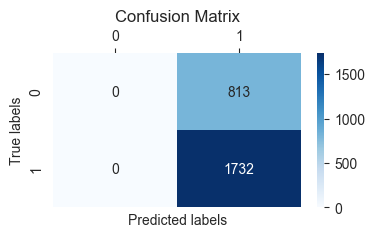


TP:1732	FP:813	FN:0	TN:0

OVERALL:
Accuracy 	==== 	68.055 %
Precision 	==== 	46.315 %
Recall Score	==== 	68.055 %
F1 SCORE 	==== 	55.119 %


In [37]:
plot_metrics(Y_train, NN.predict_label(NN.y_hat), [0,1])

# Testing Data

In [50]:
# Final predictions for testing data

y_test_hat = NN.predict(X_test_vector_svd, Y_test)[0]

--------------
:: METRICS ::
--------------



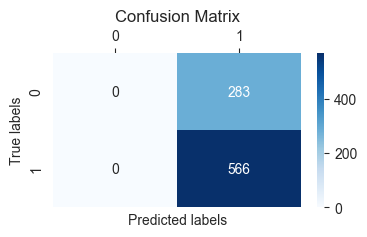


TP:566	FP:283	FN:0	TN:0

OVERALL:
Accuracy 	==== 	66.667 %
Precision 	==== 	44.444 %
Recall Score	==== 	66.667 %
F1 SCORE 	==== 	53.333 %


In [52]:
plot_metrics(Y_test, y_test_hat, [0,1])

---